In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt


# Шаг 1. Подготовка данных

In [2]:
data = pd.read_table('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep = ';')
data.head()

/tmp/ipykernel_36/3855191428.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep = ';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
len(data)

2075259

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Тип object - надо переводить в числовой

In [5]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Sub_metering_3'] = pd.to_numeric(data['Sub_metering_3'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors = 'coerce')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


Проверим на пропуски и дубли

In [7]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

In [8]:
data.drop('Date', axis=1, inplace=True)
data.drop('Time', axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [10]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data['Sub_metering_1'].fillna(data['Sub_metering_1'].mean(), inplace=True)
data['Sub_metering_2'].fillna(data['Sub_metering_2'].mean(), inplace=True)
data['Sub_metering_3'].fillna(data['Sub_metering_3'].mean(), inplace=True)

data['Global_active_power'].fillna(data['Global_active_power'].mean(), inplace=True)
data['Global_reactive_power'].fillna(data['Global_reactive_power'].mean(), inplace=True)
data['Voltage'].fillna(data['Voltage'].mean(), inplace=True)

data['Global_intensity'].fillna(data['Global_intensity'].mean(), inplace=True)

data.isnull().sum()

/tmp/ipykernel_36/1764904079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sub_metering_1'].fillna(data['Sub_metering_1'].mean(), inplace=True)
/tmp/ipykernel_36/1764904079.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [13]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [15]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,234.84,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,233.63,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,233.29,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,233.74,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,235.68,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


# Шаг 2 EDA

Исследовательский анализ данных (EDA)
- Построить графики временного ряда, чтобы визуально оценить тренды и сезонные колебания.
- Построить графики автокорреляции и частичной автокорреляции для оценки зависимости между предыдущими значениями.
- Посмотреть распределение потребления электроэнергии в зависимости от времени суток, дня недели, месяца.

## Построить график временного ряда потребления активной мощности (Global_active_power)

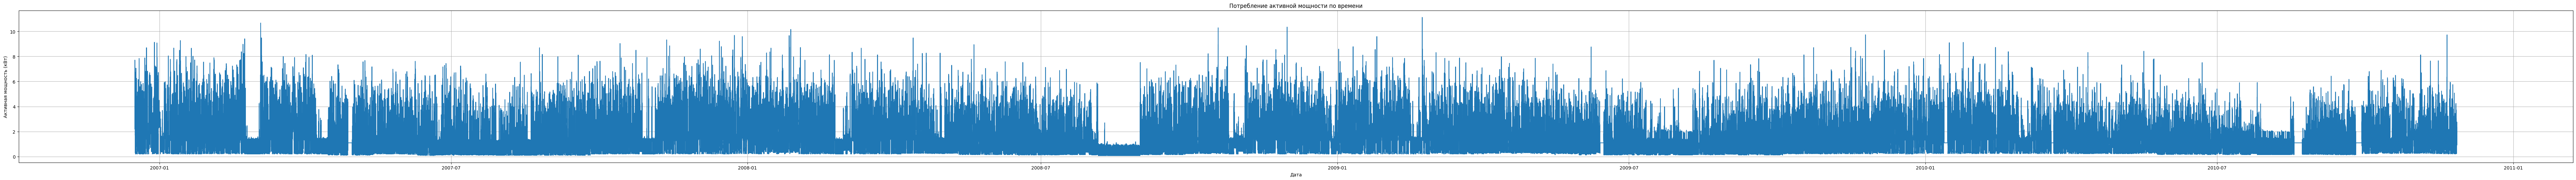

In [16]:
# График временного ряда
plt.figure(figsize=(100, 6))
plt.plot(data['Datetime'], data['Global_active_power'])
plt.title('Потребление активной мощности по времени')
plt.xlabel('Дата')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)
plt.show()


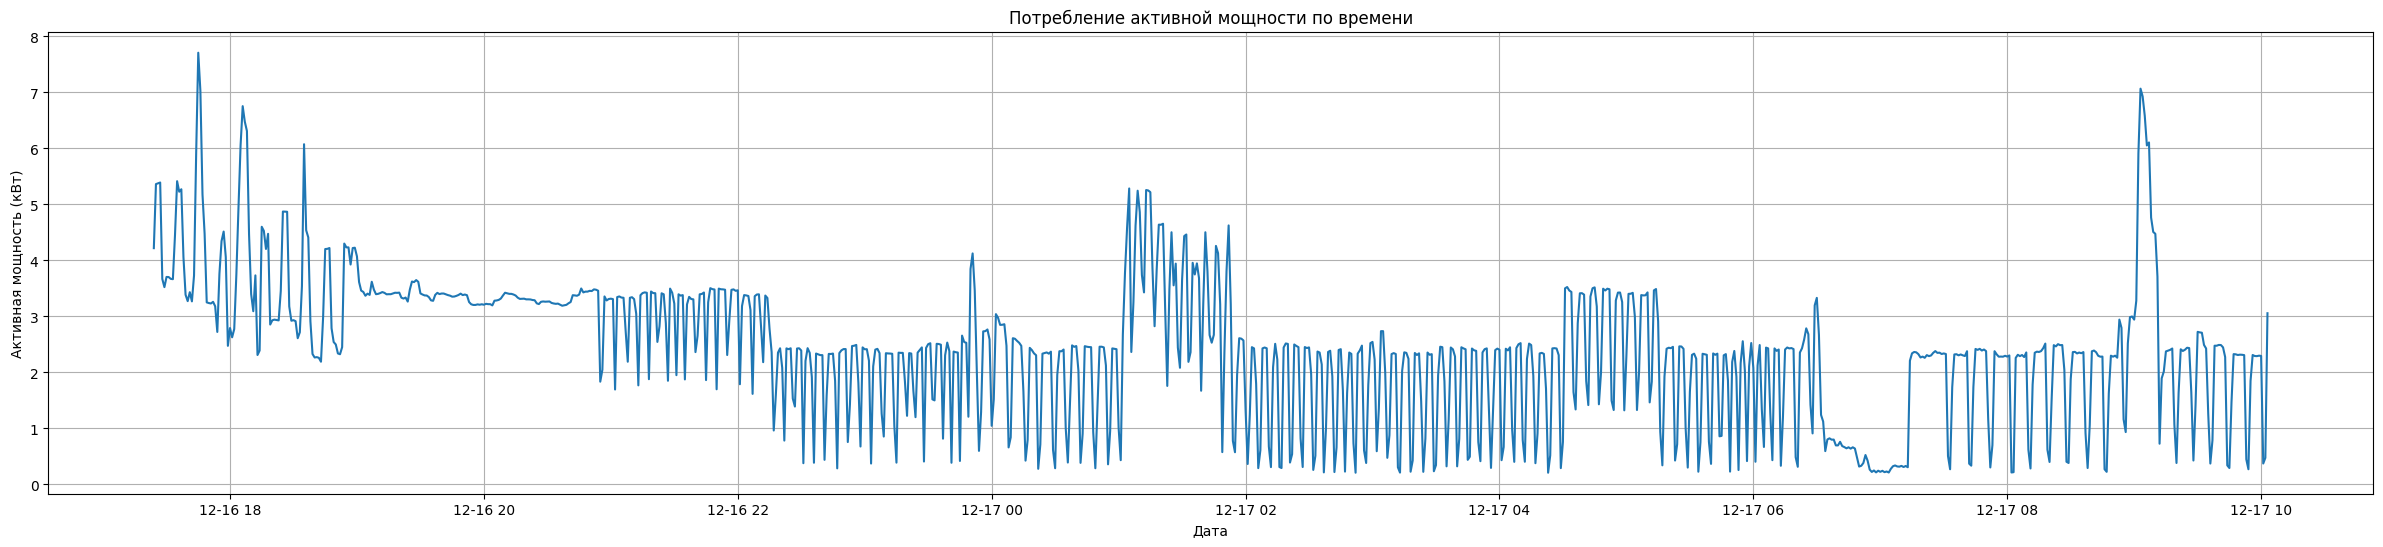

In [17]:
# График временного ряда
plt.figure(figsize=(30, 6))
plt.plot(data['Datetime'].iloc[:1000], data['Global_active_power'].iloc[:1000])
plt.title('Потребление активной мощности по времени')
plt.xlabel('Дата')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)
plt.show()

## Построить график временного ряда потребления реактивной мощности (Global_reactive_power)

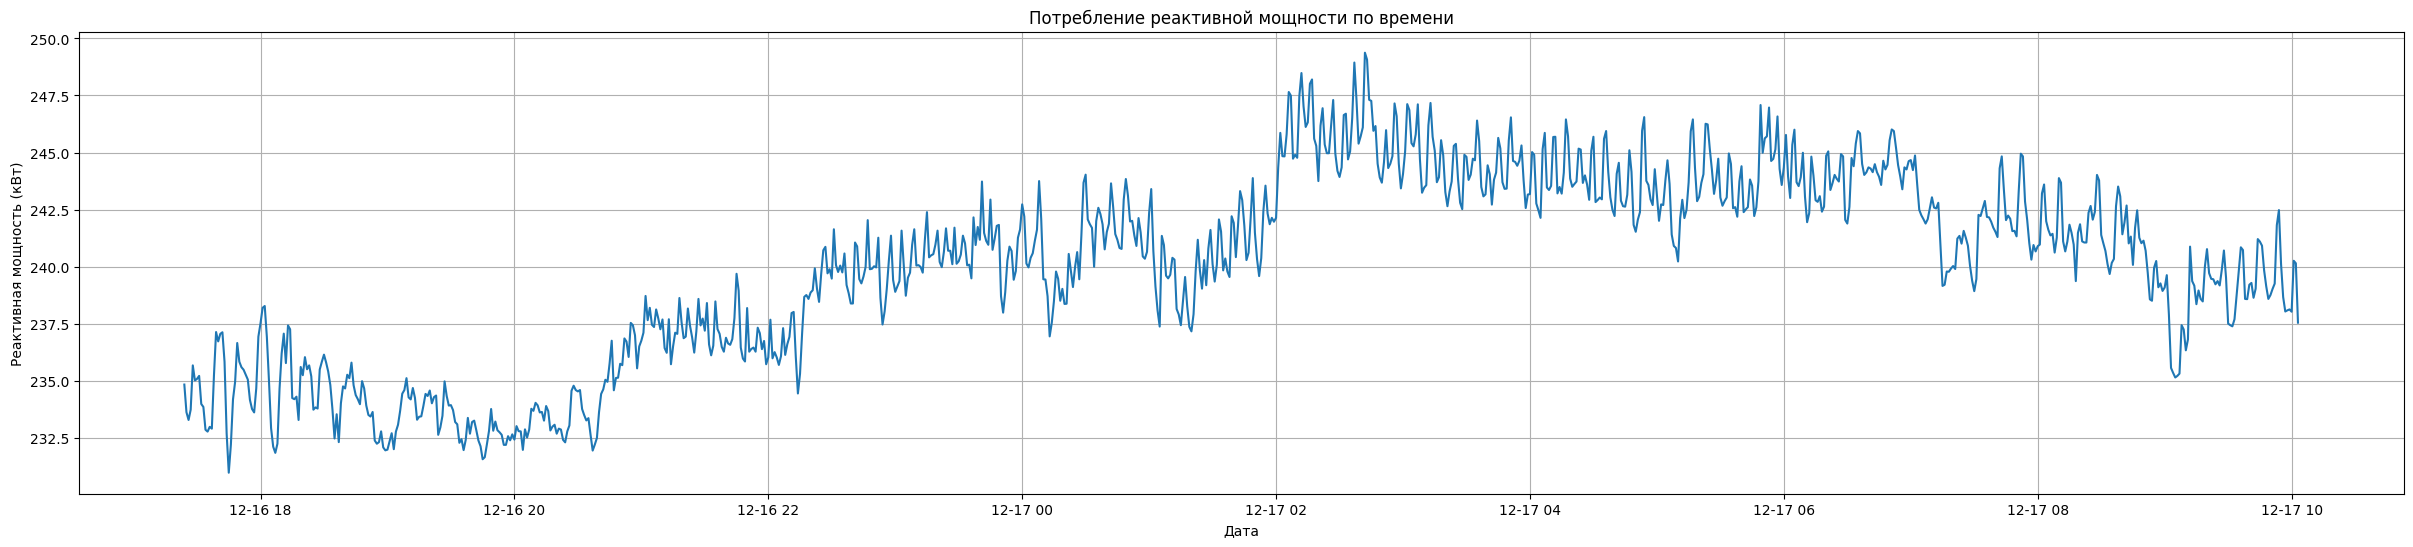

In [18]:
# График временного ряда
plt.figure(figsize=(30, 6))
plt.plot(data['Datetime'].iloc[:1000], data['Global_reactive_power'].iloc[:1000])
plt.title('Потребление реактивной мощности по времени')
plt.xlabel('Дата')
plt.ylabel('Реактивная мощность (кВт)')
plt.grid(True)
plt.show()

## Построить график временного ряда общей интенсивности (Global_intensity)

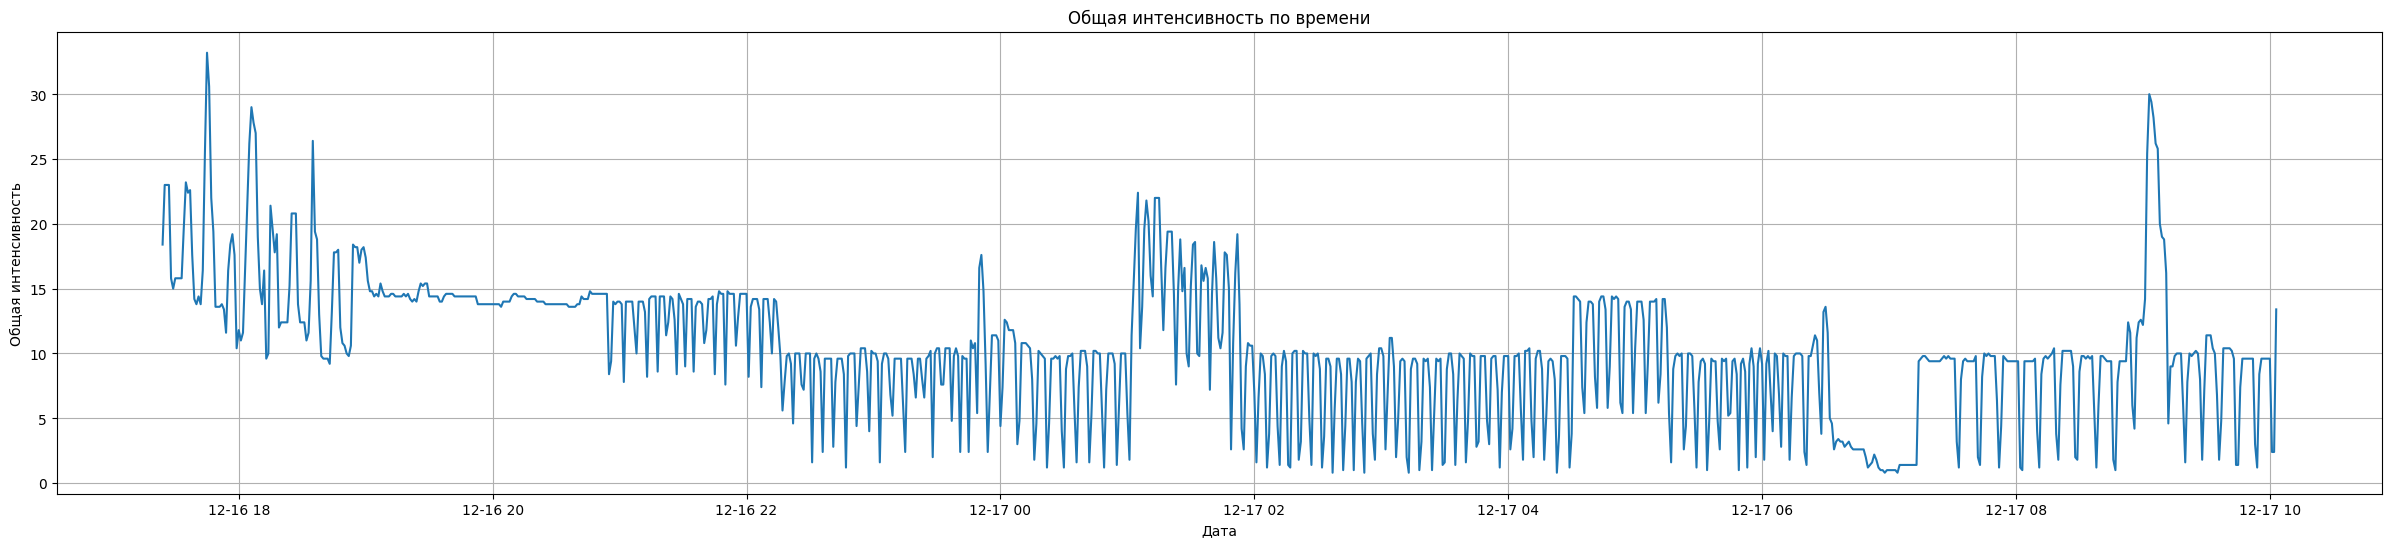

In [19]:
# График временного ряда
plt.figure(figsize=(30, 6))
plt.plot(data['Datetime'].iloc[:1000], data['Global_intensity'].iloc[:1000])
plt.title('Общая интенсивность по времени')
plt.xlabel('Дата')
plt.ylabel('Общая интенсивность')
plt.grid(True)
plt.show()

## Построить график временного ряда напряжения (Voltage)

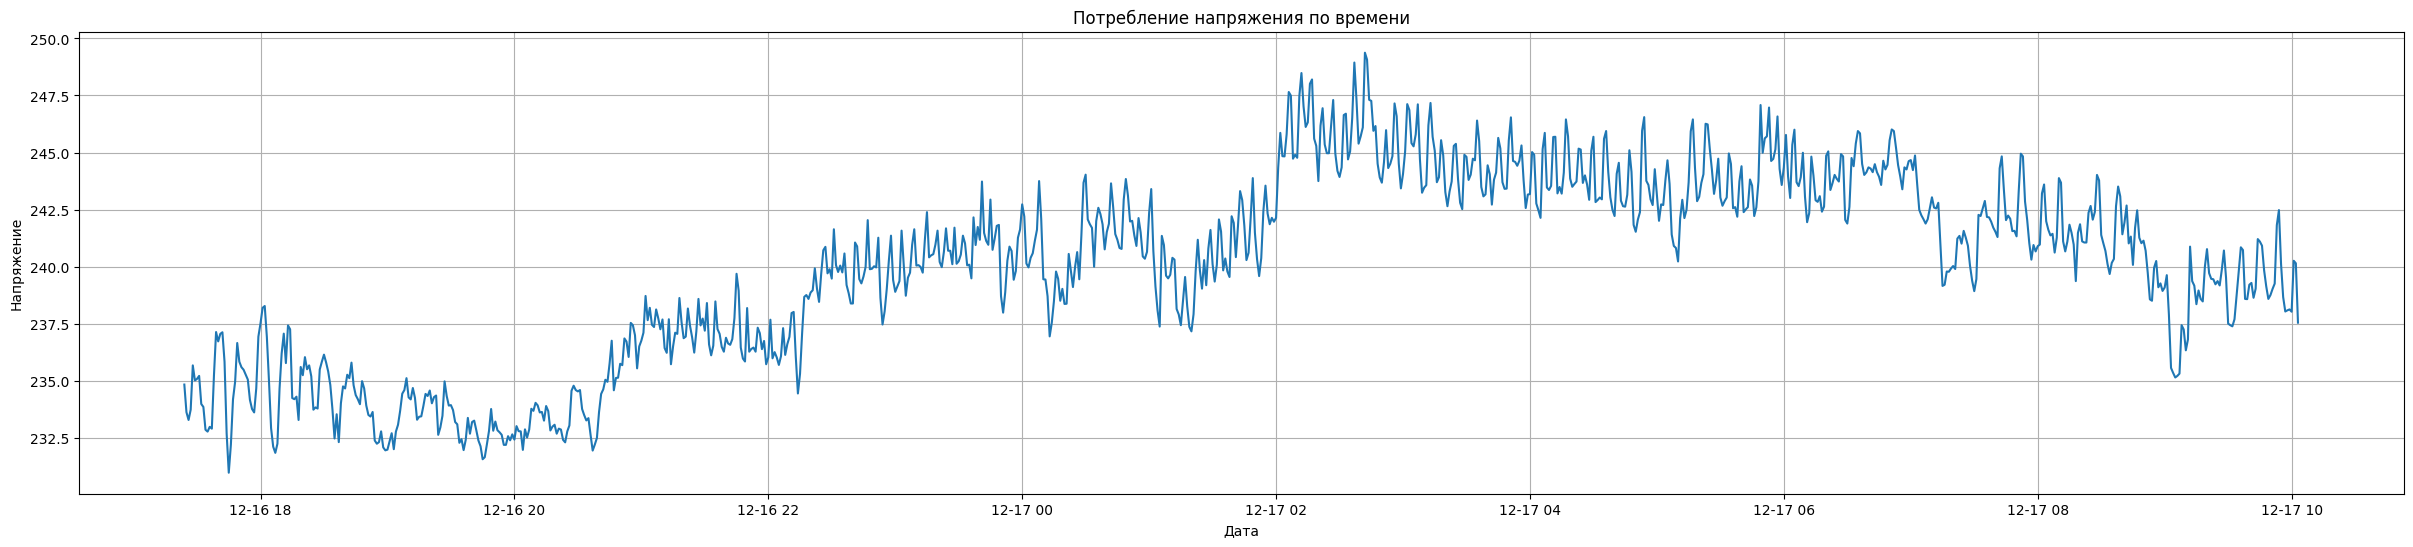

In [20]:
# График временного ряда
plt.figure(figsize=(30, 6))
plt.plot(data['Datetime'].iloc[:1000], data['Voltage'].iloc[:1000])
plt.title('Потребление напряжения по времени')
plt.xlabel('Дата')
plt.ylabel('Напряжение')
plt.grid(True)
plt.show()

## Совмещение всех графиков

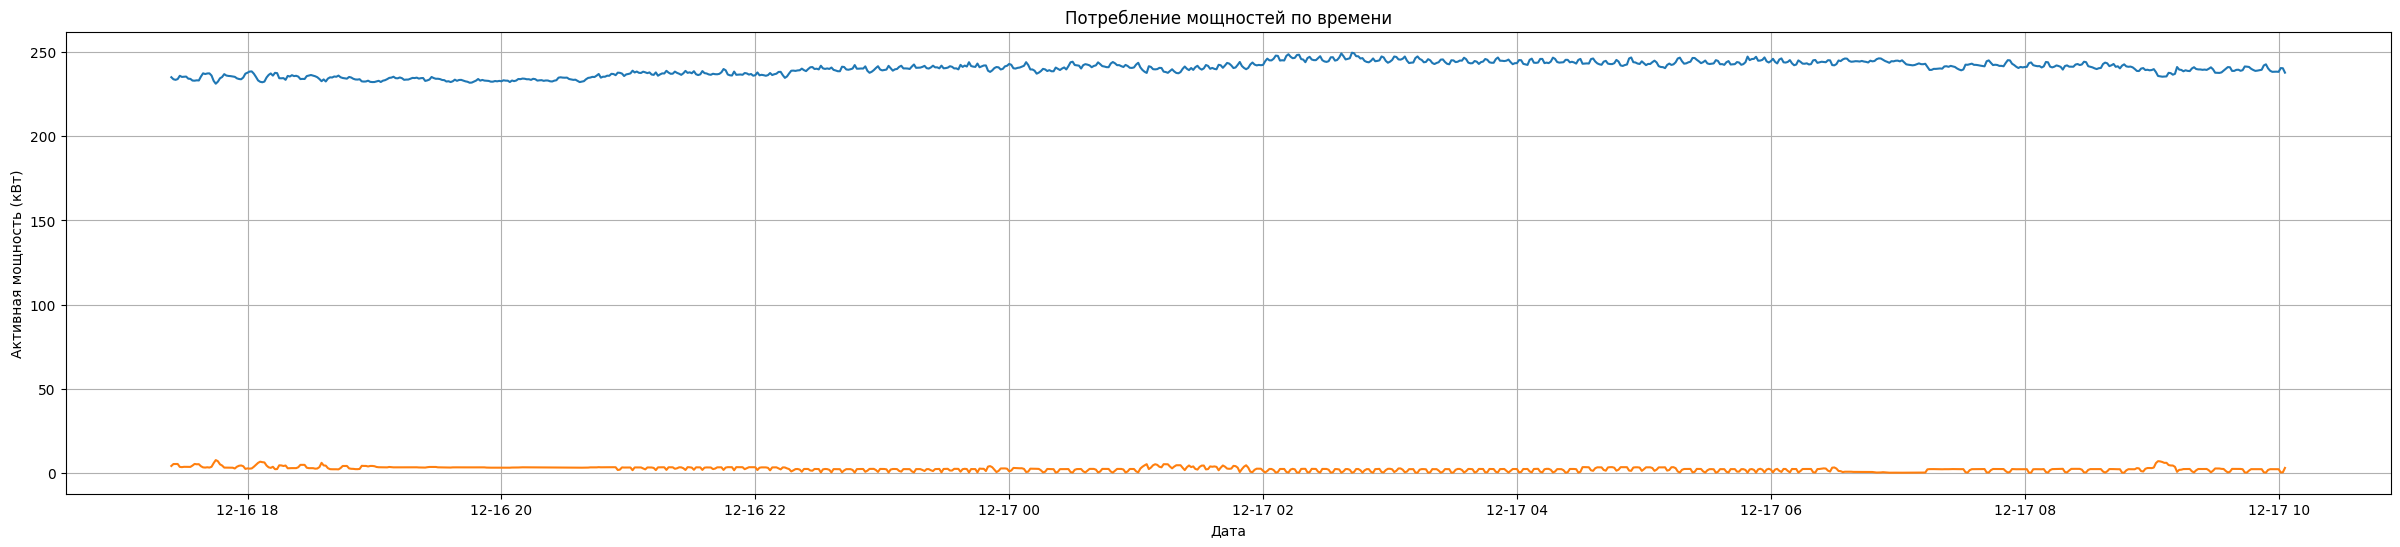

In [21]:
# График временного ряда
plt.figure(figsize=(30, 6))
plt.plot(data['Datetime'].iloc[:1000], data['Global_reactive_power'].iloc[:1000])
plt.plot(data['Datetime'].iloc[:1000], data['Global_active_power'].iloc[:1000])

plt.title('Потребление мощностей по времени')
plt.xlabel('Дата')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)
plt.show()

## Выявить сезонные тренды и пики (например, в зависимости от времени суток, дня недели).

In [22]:
data_index = data
data_index.set_index('Datetime', inplace=True)

### Потребление активной мощности по дням

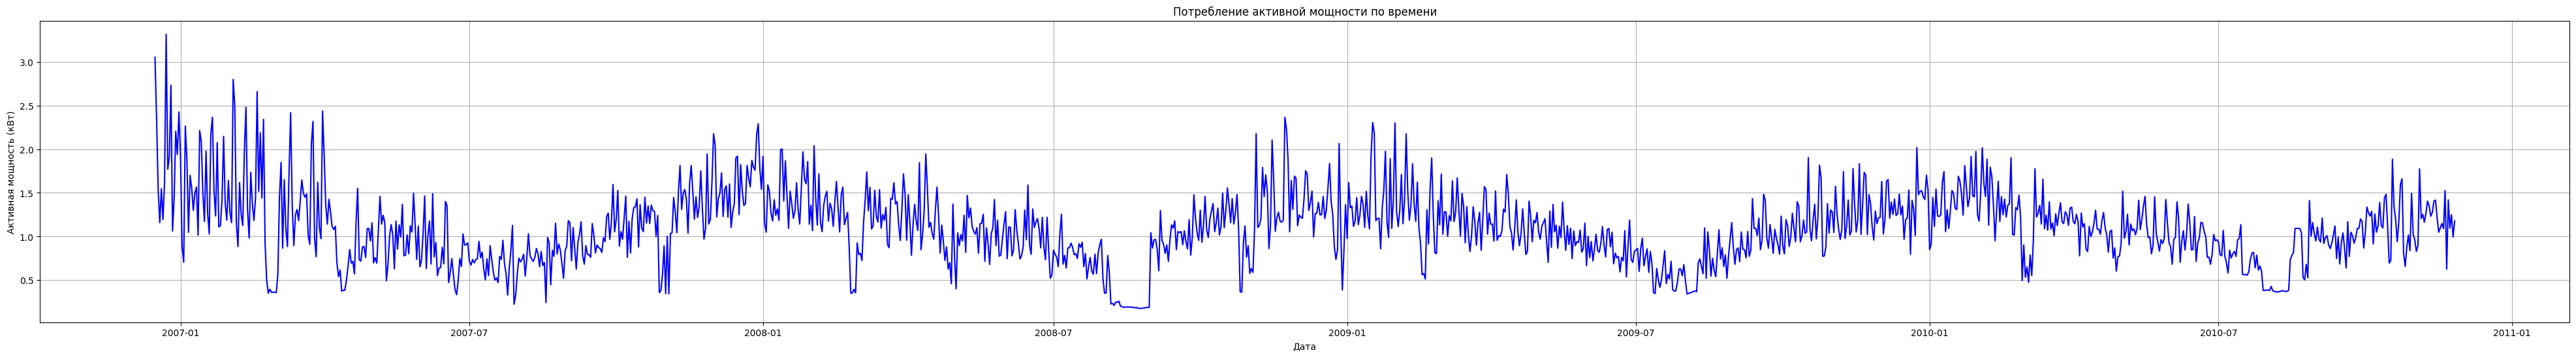

In [23]:
daily_data = data_index['Global_active_power'].resample('D').mean()
# График временного ряда
plt.figure(figsize=(50, 6))
plt.plot(daily_data.index, daily_data.values, label='Daily', color='blue')
plt.title('Потребление активной мощности по времени')
plt.xlabel('Дата')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)
plt.show()

### Потребление активной мощности по неделям

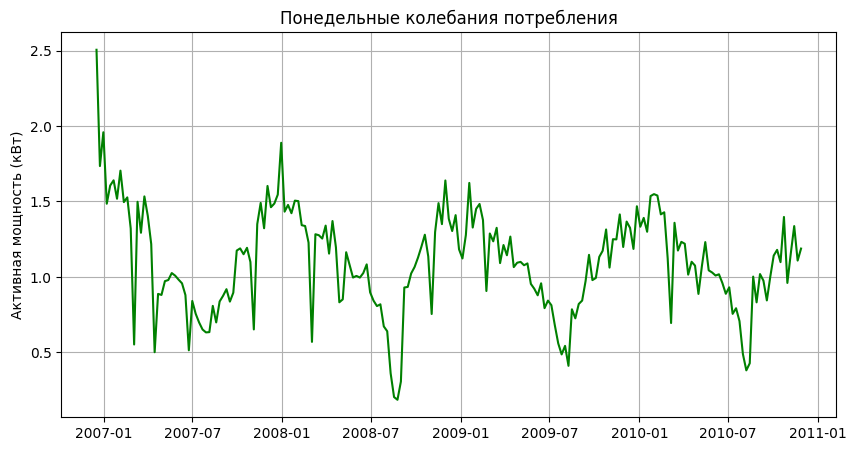

In [24]:
weekly_data = data_index['Global_active_power'].resample('W').mean()
plt.figure(figsize=(10,5))
plt.plot(weekly_data.index, weekly_data.values, label='Weekly', color='green')
plt.title('Понедельные колебания потребления')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)

### Потребление активной мощности по месяцам

/tmp/ipykernel_36/2535862362.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data_index['Global_active_power'].resample('M').mean()


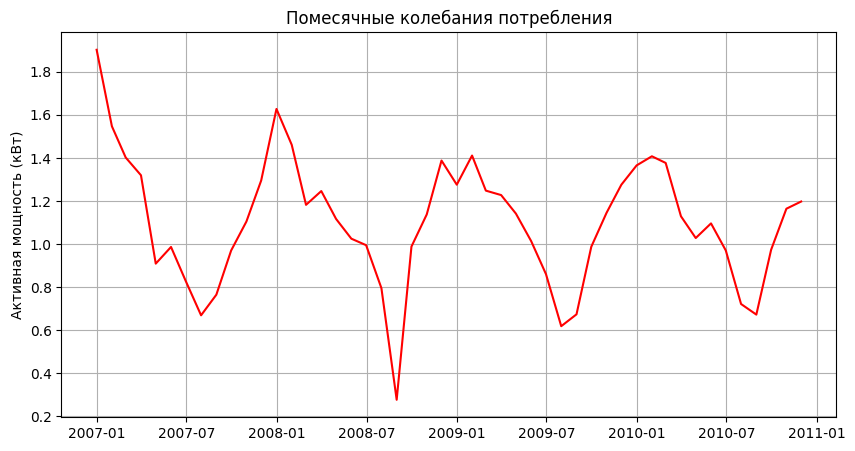

In [25]:
# Ежемесячные данные
monthly_data = data_index['Global_active_power'].resample('M').mean()
# Помесячные колебания
plt.figure(figsize=(10,5))
plt.plot(monthly_data.index, monthly_data.values, label='Monthly', color='red')
plt.title('Помесячные колебания потребления')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)

Делаем вывод, что пики приходятся на начало года))

## Взять в срезе одной недели данные и посмотреть изменения потребления энергии по подкатегориям

Необходимо масштабировать данные

In [26]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

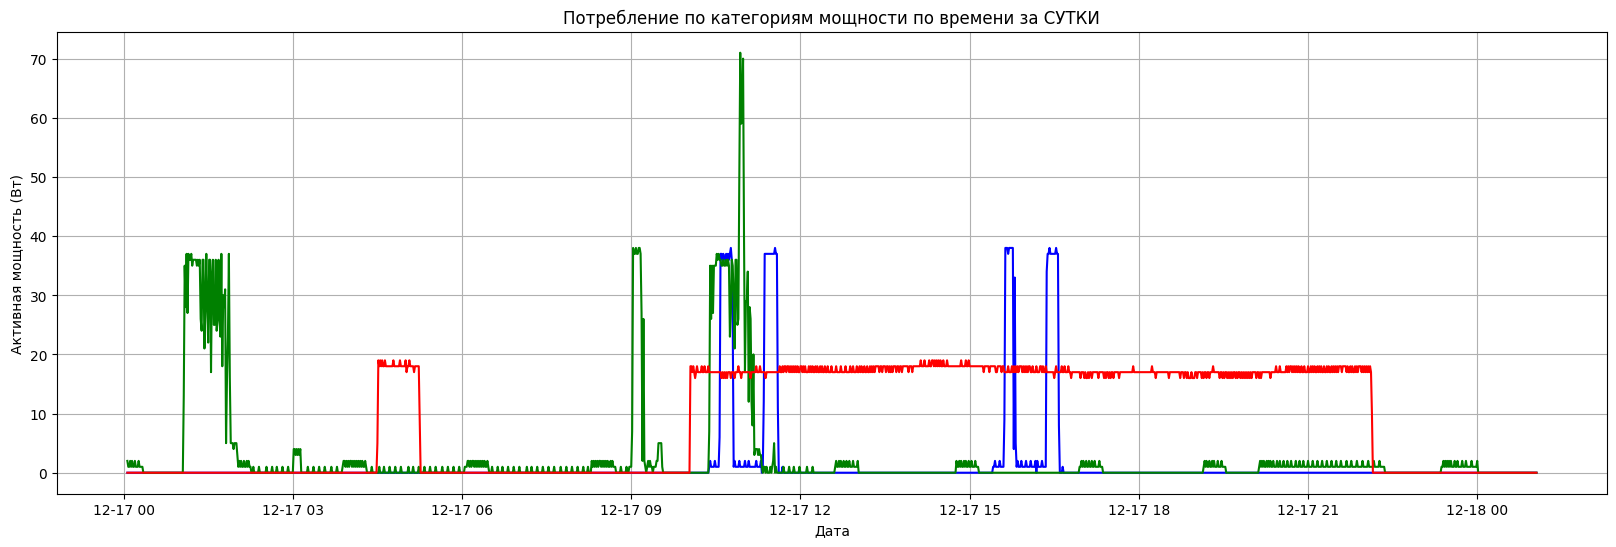

In [27]:
sub_1_data = data_index['Sub_metering_1'].iloc[400:1900]
sub_2_data = data_index['Sub_metering_2'].iloc[400:1900]
sub_3_data = data_index['Sub_metering_3'].iloc[400:1900]

# График временного ряда
plt.figure(figsize=(20, 6))
plt.plot(sub_1_data.index, sub_1_data.values, label='Daily', color='blue')
plt.plot(sub_2_data.index, sub_2_data.values, label='Daily', color='green')
plt.plot(sub_3_data.index, sub_3_data.values, label='Daily', color='red')

plt.title('Потребление по категориям мощности по времени за СУТКИ')
plt.xlabel('Дата')
plt.ylabel('Активная мощность (Вт)')
plt.grid(True)
plt.show()

- Sub_metering_1: Энергия, потребляемая в зоне 1 (кухня) (в ватт-часах).
- Sub_metering_2: Энергия, потребляемая в зоне 2 (стирка, холодильник, осветительные приборы).
- Sub_metering_3: Энергия, потребляемая в зоне 3 (тепловой насос, кондиционер).

In [28]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,234.84,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,233.63,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,233.29,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,233.74,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,235.68,235.68,15.8,0.0,1.0,17.0


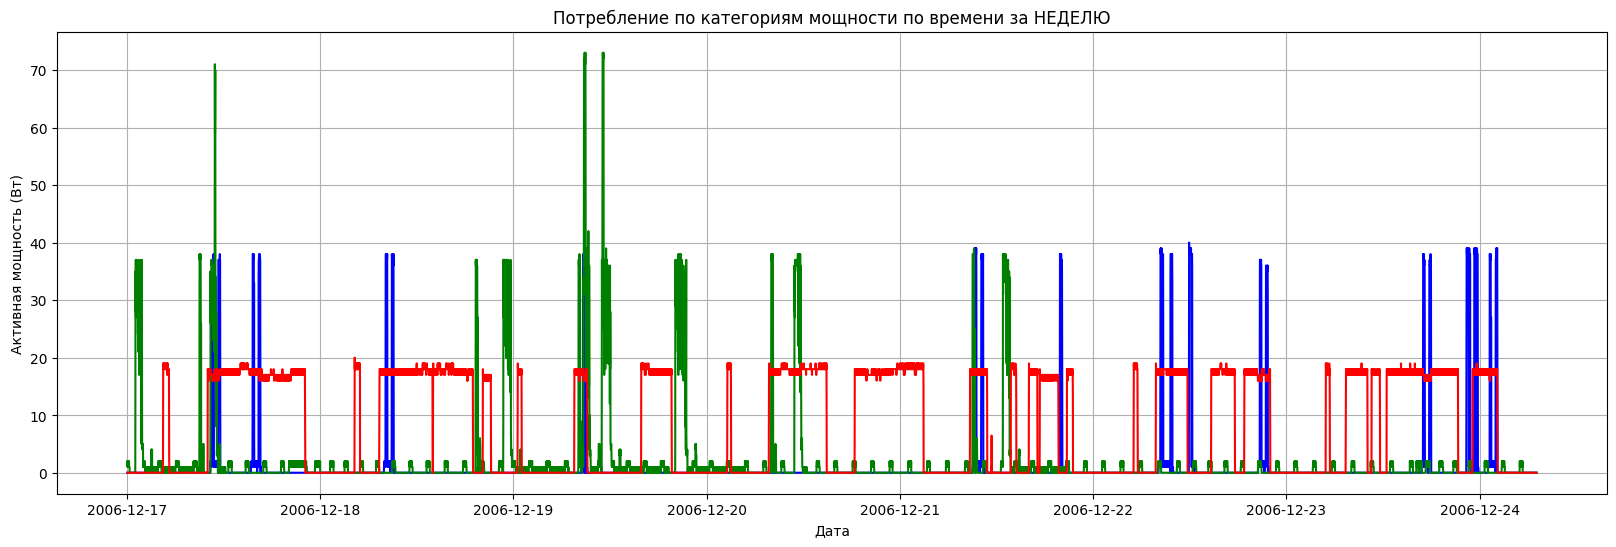

In [29]:
sub_1_data = data_index['Sub_metering_1'].iloc[400:10900]
sub_2_data = data_index['Sub_metering_2'].iloc[400:10900]
sub_3_data = data_index['Sub_metering_3'].iloc[400:10900]

# График временного ряда
plt.figure(figsize=(20, 6))
plt.plot(sub_1_data.index, sub_1_data.values, label='Daily', color='blue')
plt.plot(sub_2_data.index, sub_2_data.values, label='Daily', color='green')
plt.plot(sub_3_data.index, sub_3_data.values, label='Daily', color='red')

plt.title('Потребление по категориям мощности по времени за НЕДЕЛЮ')
plt.xlabel('Дата')
plt.ylabel('Активная мощность (Вт)')
plt.grid(True)
plt.show()

# Шаг 3 Анализ тренда и сезонности временных рядов

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
# 
import statsmodels.api as sm

## Декомпозиция врменного ряда

Для анализа необходимо сделать декомпозицию временного ряда на эти компоненты. 

Воспользуемся функцией `sm.tsa.seasonal_decompose` из библиотеки statsmodels, которая выполняет аддитивную или мультипликативную декомпозицию временного ряда на компоненты: тренд, сезонность и остатки.

Основные аргументы этой функции:

* `series`: временной ряд, который необходимо декомпозировать.
* `model`: вид декомпозиции, может быть 'additive' (аддитивная) или 'multiplicative' (мультипликативная).
* `period`: период сезонности, например, 12 для ежемесячных данных или 4 для ежеквартальных.

Функция возвращает объект `seasonal_decompose`, который содержит следующие атрибуты:

* `trend`: тренд временного ряда.
* `seasonal`: сезонная компонента.
* `resid`: нерегулярная компонента / остатки.
* `observed`: исходный временной ряд.

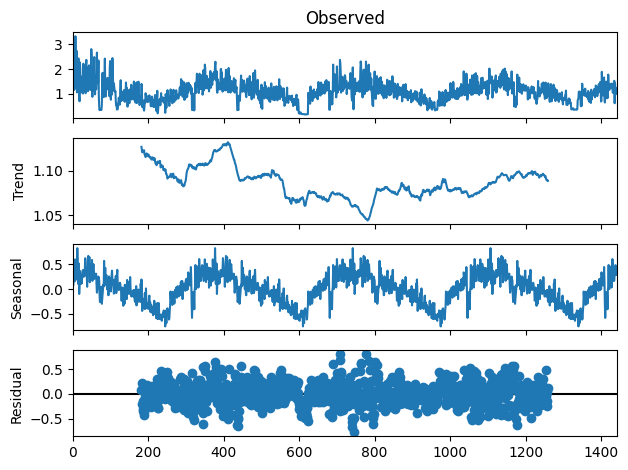

In [31]:
# Выполним декомпозицию
decomposition = sm.tsa.seasonal_decompose(daily_data.values, model='additive', period=365)  # Для дневных данных зададим период 365 для годовой сезонности

# Визуализируем результаты
decomposition.plot()
plt.show()

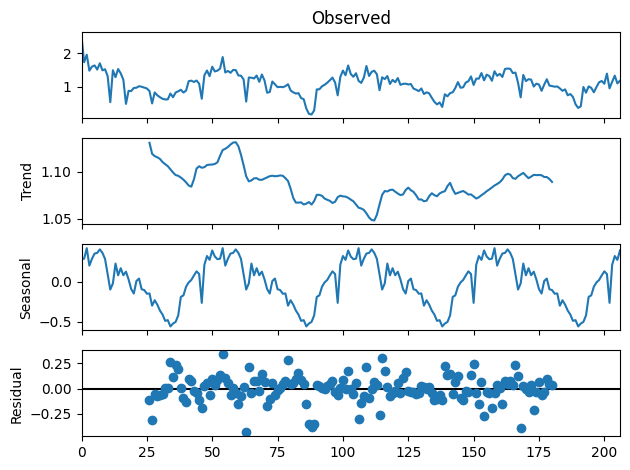

In [32]:
# Выполним декомпозицию
decomposition = sm.tsa.seasonal_decompose(weekly_data.values, model='additive', period=52)  # Для дневных данных зададим период 365 для годовой сезонности

# Визуализируем результаты
decomposition.plot()
plt.show()

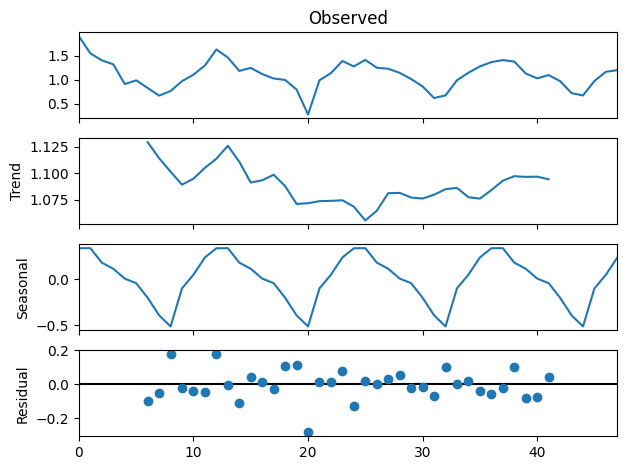

In [33]:
# Выполним декомпозицию
decomposition = sm.tsa.seasonal_decompose(monthly_data.values, model='additive', period=12)  # Для дневных данных зададим период 365 для годовой сезонности

# Визуализируем результаты
decomposition.plot()
plt.show()

## Определение сезонности с помощью автоматической корреляции

Мы определим сезонность, используя график автокорреляционной функции (ACF). Пики через регулярные промежутки времени на графике ACF предполагают наличие сезонности.

<Figure size 1200x600 with 0 Axes>

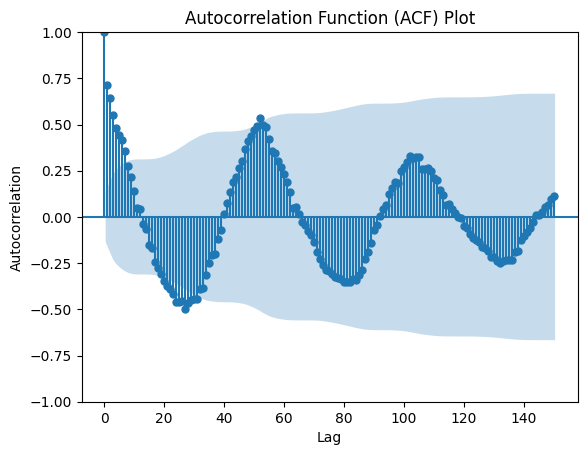

In [34]:
plt.figure(figsize=(12, 6))
plot_acf(weekly_data.values, lags=150) 

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

Наличие сезонности обычно обозначается пиками или всплесками через регулярные промежутки времени, следовательно сезонность в наших данных есть

## Определение стационарности

Мы выполним тест ADF для формальной проверки на стационарность.

Тест основан на;

* Нулевая гипотеза о том, что во временном ряду присутствует единичный корень, указывает на то, что ряд нестационарен.
* Альтернативная гипотеза заключается в том, что ряд остается стационарным после разнесения (т. Е. У него нет единичного корня).

В тесте ADF используется дополненная регрессионная модель, которая включает запаздывающие различия рядов для определения наличия единичного корня.

In [35]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming df is your DataFrame
result = adfuller(weekly_data.values)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.349834737844265
p-value: 0.00036376103201717866
Critical Values: {'1%': -3.4626576734812318, '5%': -2.8757444215841326, '10%': -2.5743412314098753}


**Интерпретации данных**

Результаты теста на стационарность (тест Дики-Фуллера, ADF) указывают на то, что ряд, вероятно, стационарен. 

- ADF Statistic (ADF-статистика):

Ваша ADF-статистика равна -4.3498. Эта величина измеряет, насколько данные временного ряда отклоняются от стационарности.
Чем ниже (отрицательнее) значение ADF, тем больше вероятность, что ряд стационарен.

- p-value (p-значение):

Значение p-value = 0.00036. Это значение определяет уровень статистической значимости. Обычно используется пороговое значение 0.05.
Если p-value < 0.05, то мы отвергаем нулевую гипотезу о нестационарности временного ряда и говорим, что ряд стационарен.
В нашем случае p-value значительно меньше 0.05, что подтверждает стационарность ряда.

Critical Values (критические значения):

Это критические значения для различных уровней значимости (1%, 5%, 10%).
* Для уровня 1%: -3.4627
* Для уровня 5%: -2.8757
* Для уровня 10%: -2.5743

### Тест Квитка-Филлипса-Шмидта-Шина (KPSS-тест)

KPSS-тест основывается на анализе суммы квадратов отклонений накопленных частичных сумм от линейного тренда.

В отличие от ADF-теста, который проверяет нулевую гипотезу о нестационарности, KPSS-тест проверяет нулевую гипотезу о стационарности вокруг детерминированного тренда, против альтернативы наличия единичного корня. Он проводится на основе следующих гипотез:

* нулевая гипотеза (H₀): ряд стационарен, т.е. не содержит единичного корня.
* альтернативная гипотеза (H₁): ряд нестационарен, т.е. содержит единичный корень.

Результат теста определяется p-value:

* **p-value > 0.05: невозможно отвергнуть нулевую гипотезу (H₀). Ряд считается стационарным.**
* p-value <= 0.05: можно принять альтернативную гипотезу (H₁). Ряд считается нестационарным.

In [36]:
from statsmodels.tsa.stattools import kpss

result_kpss = kpss(weekly_data.values, regression = 'c')
print('KPSS Test:')
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print(f'Critical Values:')
for key, value in result_kpss[3].items():
    print(f'   {key}: {value}')

KPSS Test:
KPSS Statistic: 0.12226602507304392
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/tmp/ipykernel_36/23792383.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(weekly_data.values, regression = 'c')


**Интепретация**

Оба теста указывают на то, что ряд стационарен

## Сглаживание данных с помощью скользящего среднего SMA

Дифференцирование включает в себя вычитание предыдущего наблюдения из текущего для удаления тенденций или сезонности.

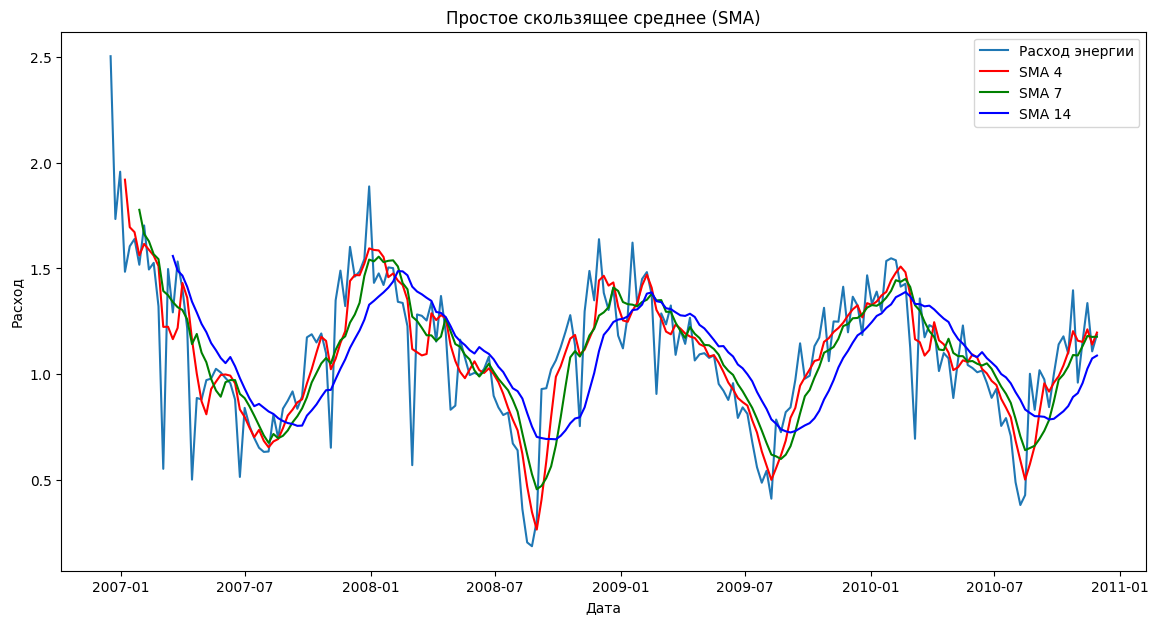

In [37]:
# Параметры для скользящего среднего
window_size_5 = 4  # короткий период
window_size_7 = 7  # короткий период

window_size_28 = 14   # длинный период

# Расчет скользящего среднего
sma_5 = weekly_data.rolling(window=window_size_5).mean()
sma_7 = weekly_data.rolling(window=window_size_7).mean()
sma_28 = weekly_data.rolling(window=window_size_28).mean()


# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(weekly_data, label='Расход энергии')
plt.plot(sma_5, label=f'SMA {window_size_5}', color='red')
plt.plot(sma_7, label=f'SMA {window_size_7}', color='green')
plt.plot(sma_28, label=f'SMA {window_size_28}', color='blue')

plt.title('Простое скользящее среднее (SMA)')
plt.xlabel('Дата')
plt.ylabel('Расход')
plt.legend()
plt.show()

# Шаг 4 Построение модели прогноза

## ARIMA

Описание: ARIMA — одна из самых распространенных моделей для прогнозирования временных рядов. Она сочетает в себе три основных компонента:

* AR (AutoRegressive): Авторегрессия, учитывает зависимость текущего значения временного ряда от его предыдущих значений.
* I (Integrated): Дифференцирование временного ряда для достижения стационарности.
* MA (Moving Average): Среднее скользящее, учитывает зависимость от ошибок прогноза (шум).

Модель ARIMA хорошо подходит для данных без явной сезонности

In [38]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_data.values, order=(5, 1, 0))
model_fit = model.fit()

# Делаем прогноз на следующие 30 дней
forecast = model_fit.forecast(steps=30)
print(forecast)

[1.03935154 1.14897542 1.11253865 1.14486106 1.09146737 1.12821387
 1.10759456 1.11962464 1.11393239 1.1232465  1.11224037 1.1177484
 1.11586289 1.11727342 1.11546737 1.11789982 1.1161232  1.11655785
 1.11647061 1.11687003 1.11630145 1.11676    1.11659906 1.11657597
 1.11653079 1.11667402 1.11654975 1.11659609 1.11660395 1.11660105]


## SARIMA (Seasonal ARIMA)

Описание: SARIMA расширяет модель ARIMA, добавляя компонент сезонности. Подходит для временных рядов с выраженной сезонностью (например, продажи в зависимости от времени года).

Компоненты: Включает в себя параметры для сезонности (P, D, Q) вместе с обычными параметрами ARIMA (p, d, q).

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA модель с сезонностью 12 (например, месячные данные)
model = SARIMAX(monthly_data.values, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Прогноз на следующие 12 месяцев
forecast = model_fit.forecast(steps=12)
print(forecast)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.35461D-01    |proj g|=  2.50936D-01

At iterate    5    f= -2.92967D-01    |proj g|=  5.58191D-02

At iterate   10    f= -2.94374D-01    |proj g|=  1.56497D-01


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   15    f= -2.94818D-01    |proj g|=  7.54456D-02

At iterate   20    f= -2.97649D-01    |proj g|=  1.36322D-01

At iterate   25    f= -2.99418D-01    |proj g|=  7.25167D-02

At iterate   30    f= -2.99773D-01    |proj g|=  5.15545D-03

At iterate   35    f= -2.99855D-01    |proj g|=  5.36540D-02

At iterate   40    f= -2.99878D-01    |proj g|=  6.00929D-03

At iterate   45    f= -2.99879D-01    |proj g|=  2.22800D-03

At iterate   50    f= -2.99879D-01    |proj g|=  2.47931D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     77      1     0     0   2.479D-03  -2.999D-01
  F = -0.299879497028

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 3. Prophet

Описание: Это модель от Facebook для прогнозирования временных рядов, особенно хорошо работающая с данными, где присутствует сезонность и аномальные значения. Prophet позволяет учитывать тренды, сезонные колебания и праздники.

Особенности: Простота использования, возможность обработки пропусков данных и нелинейных трендов.

In [40]:
from fbprophet import Prophet
daily_data = daily_data.reset_index()
daily_data.rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'}, inplace=True)

model = Prophet()
model.fit(daily_data)

# Прогноз на следующие 30 дней
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
model.plot(forecast)
plt.show()

ModuleNotFoundError: No module named 'fbprophet'

## 4. Exponential Smoothing (Экспоненциальное сглаживание)

Описание: Модель экспоненциального сглаживания делает прогнозы на основе взвешенной суммы предыдущих значений ряда, где более поздние значения имеют больший вес.

Модель ETS (Error-Trend-Seasonality) используется для временных рядов с трендом и/или сезонностью.

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Применение модели Holt-Winters (с трендом и сезонностью)
model = ExponentialSmoothing(daily_data.values, trend='add', seasonal='add', seasonal_periods=28)
model_fit = model.fit()

# Прогноз на следующие 12 месяцев
forecast = model_fit.forecast(steps=28)
print(forecast)

[1.31226033 1.31575716 1.03166572 1.08869684 1.14724637 1.06632335
 1.08667409 1.28204899 1.29564429 1.08053918 1.153903   1.19471143
 1.06331468 1.12337739 1.35377762 1.28675842 1.09000898 1.15820009
 1.18064576 1.04641876 1.14539688 1.34797097 1.26427751 1.09109036
 1.17050474 1.10099    1.04931487 1.11095786]


In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(forecast)

# Шаг 5. Оценка моделей

In [43]:
# Определим точку разделения данных на тренировочную и тестовую выборку
train_size = int(len(weekly_data) * 0.8)  # например, 80% данных на тренировку
train, test = weekly_data[:train_size], weekly_data[train_size:]

# Выводим длину тренировочной и тестовой выборки
print(f'Training data: {len(train)}')
print(f'Test data: {len(test)}')


Training data: 165
Test data: 42


In [44]:
import itertools
import warnings
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

# Определяем возможные значения для p, d, q
p = d = q = range(0, 5)

# Создаем комбинации параметров
pdq = list(itertools.product(p, d, q))

# Перебираем все комбинации
best_score, best_params = float('inf'), None
for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, predictions)
        
        if mse < best_score:
            best_score, best_params = mse, param
        print(f'ARIMA{param} - MSE: {mse}')
    except:
        continue

print(f'Best ARIMA Parameters: {best_params} with MSE: {best_score}')


ARIMA(0, 0, 0) - MSE: 0.06884654301222254
ARIMA(0, 0, 1) - MSE: 0.06830840013989779
ARIMA(0, 0, 2) - MSE: 0.06799465741614336
ARIMA(0, 0, 3) - MSE: 0.06854073785202117
ARIMA(0, 0, 4) - MSE: 0.06953258399320061
ARIMA(0, 1, 0) - MSE: 0.3319478999785758
ARIMA(0, 1, 1) - MSE: 0.3180588172635567
ARIMA(0, 1, 2) - MSE: 0.31693086743072574
ARIMA(0, 1, 3) - MSE: 0.3046090912781718
ARIMA(0, 1, 4) - MSE: 0.2986934371487302
ARIMA(0, 2, 0) - MSE: 0.16464055812342018
ARIMA(0, 2, 1) - MSE: 0.21548196231077246
ARIMA(0, 2, 2) - MSE: 0.5054423316616834
ARIMA(0, 2, 3) - MSE: 0.5174273889342592
ARIMA(0, 2, 4) - MSE: 0.5720521836416255
ARIMA(0, 3, 0) - MSE: 85.205378244383
ARIMA(0, 3, 1) - MSE: 4.395422563510969
ARIMA(0, 3, 2) - MSE: 7.171303527783571
ARIMA(0, 3, 3) - MSE: 1.778575530511987
ARIMA(0, 3, 4) - MSE: 1.9948642281657798
ARIMA(0, 4, 0) - MSE: 1105599.2169095606
ARIMA(0, 4, 1) - MSE: 1733.230340606996
ARIMA(0, 4, 2) - MSE: 13.580447647431026
ARIMA(0, 4, 3) - MSE: 12.32378249317096
ARIMA(0, 4, 4) -

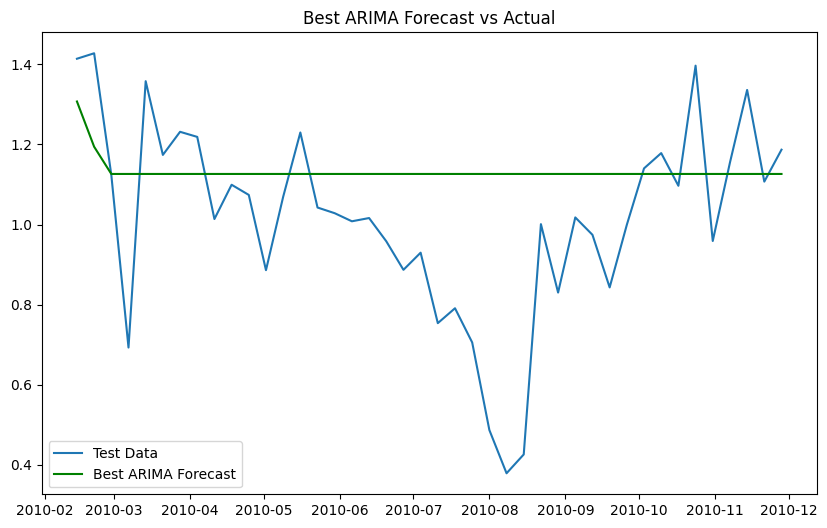

In [45]:
# Используем наилучшие параметры
best_model = ARIMA(train, order=best_params)
best_model_fit = best_model.fit()

# Прогнозирование
best_forecast = best_model_fit.forecast(steps=len(test))

# Визуализируем результат
plt.figure(figsize=(10, 6))
plt.plot(test, label='Test Data')
plt.plot(best_forecast, label='Best ARIMA Forecast', color='green')
plt.title('Best ARIMA Forecast vs Actual')
plt.legend()
plt.show()
